In [ ]:
# Install any missing dependencies (run this in your terminal or Jupyter Notebook)
# !pip install pandas matplotlib seaborn numpy

In [2]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the datasets from the 'data' folder
cheese_df = pd.read_csv('./data/cheese_data.csv')
weather_df = pd.read_csv('./data/canada_weather.csv')


In [4]:
# 1. examinging the datasets by looking at the first few rows

# Check cheese dataset structure
print("CHEESE DATASET PREVIEW:")
print("-" * 50)
print(cheese_df.head())
print("\nDataset shape:", cheese_df.shape)
print("\nColumn data types:")
print(cheese_df.dtypes)
print("\n" + "=" * 70 + "\n")

# Check weather dataset structure
print("WEATHER DATASET PREVIEW:")
print("-" * 50)
print(weather_df.head())
print("\nDataset shape:", weather_df.shape)
print("\nColumn data types:")
print(weather_df.dtypes)
print("\n" + "=" * 70 + "\n")



CHEESE DATASET PREVIEW:
--------------------------------------------------
   CheeseId ManufacturerProvCode ManufacturingTypeEn  MoisturePercent  \
0       228                   NB           Farmstead             47.0   
1       242                   NB           Farmstead             47.9   
2       301                   ON          Industrial             54.0   
3       303                   NB           Farmstead             47.0   
4       319                   NB           Farmstead             49.4   

                                          FlavourEn  \
0                                     Sharp, lactic   
1                Sharp, lactic, lightly caramelized   
2                           Mild, tangy, and fruity   
3  Sharp with fruity notes and a hint of wild honey   
4                                      Softer taste   

                                   CharacteristicsEn  Organic  \
0                                           Uncooked        0   
1                        

In [6]:
# Check for NULL values in the datasets

print("\nCheese Dataset\n",cheese_df.isnull().sum())
print("\n Weather Dataset\n",weather_df.isnull().sum())


Cheese Dataset
 CheeseId                  0
ManufacturerProvCode      0
ManufacturingTypeEn       0
MoisturePercent          14
FlavourEn               241
CharacteristicsEn       399
Organic                   0
CategoryTypeEn           23
MilkTypeEn                1
MilkTreatmentTypeEn      65
RindTypeEn              321
CheeseName                0
FatLevel                  0
dtype: int64

 Weather Dataset
 Community                     0
Weather station               3
Location                      0
Elevation                     0
January(Avg. high °C (°F))    0
January(Avg. low °C (°F))     0
July(Avg. high °C (°F))       0
July(Avg. low °C (°F))        0
Annual(Avg. high °C (°F))     0
Annual(Avg. low °C (°F))      0
dtype: int64


In [7]:
# Fill missing values in numerical columns
cheese_df['MoisturePercent'] = cheese_df['MoisturePercent'].fillna(cheese_df['MoisturePercent'].mean())

# Fill missing values in categorical columns
cheese_df['FlavourEn'] = cheese_df['FlavourEn'].fillna('Not Specified')
cheese_df['CategoryTypeEn'] = cheese_df['CategoryTypeEn'].fillna('Not Specified')
cheese_df['MilkTypeEn'] = cheese_df['MilkTypeEn'].fillna('Not Specified')
cheese_df['MilkTreatmentTypeEn'] = cheese_df['MilkTreatmentTypeEn'].fillna('Not Specified')
cheese_df['RindTypeEn'] = cheese_df['RindTypeEn'].fillna('Not Specified')

# Fill missing values in text columns
cheese_df['CharacteristicsEn'] = cheese_df['CharacteristicsEn'].fillna('Not specified')

# Verify no missing values remain
print(cheese_df.isnull().sum())

CheeseId                0
ManufacturerProvCode    0
ManufacturingTypeEn     0
MoisturePercent         0
FlavourEn               0
CharacteristicsEn       0
Organic                 0
CategoryTypeEn          0
MilkTypeEn              0
MilkTreatmentTypeEn     0
RindTypeEn              0
CheeseName              0
FatLevel                0
dtype: int64


In [8]:
# Extract province code from 'Community' in weather_df
# Since 'Community' contains 'City, Province', we can split it
weather_df['ProvinceCode'] = weather_df['Community'].str.split(',').str[1].str.strip()

# Check extracted ProvinceCode
print(weather_df[['Community', 'ProvinceCode']].head())

           Community ProvinceCode
0       Alberton, PE           PE
1     Baker Lake, NU           NU
2    Baie-Comeau, QC           QC
3        Calgary, AB           AB
4  Charlottetown, PE           PE


In [11]:
# Merge cheese_df with weather_df on province codes
merged_df = pd.merge(cheese_df, weather_df, left_on='ManufacturerProvCode', right_on='ProvinceCode', how='inner')

# Save the merged dataset to a CSV file
merged_df.to_csv('./data/merged_cheese_weather.csv', index=False)

# Display the merged dataset
print("MERGED DATASET PREVIEW:")
print(merged_df.head())
print("\nDataset shape:", merged_df.shape)

# Analyse the average moisture percentage by province
avg_moisture_by_province = merged_df.groupby('ProvinceCode')['MoisturePercent'].mean()
print("\nAverage Moisture Percentage by Province:")
print(avg_moisture_by_province)

MERGED DATASET PREVIEW:
   CheeseId ManufacturerProvCode ManufacturingTypeEn  MoisturePercent  \
0       228                   NB           Farmstead             47.0   
1       228                   NB           Farmstead             47.0   
2       228                   NB           Farmstead             47.0   
3       242                   NB           Farmstead             47.9   
4       242                   NB           Farmstead             47.9   

                            FlavourEn CharacteristicsEn  Organic  \
0                       Sharp, lactic          Uncooked        0   
1                       Sharp, lactic          Uncooked        0   
2                       Sharp, lactic          Uncooked        0   
3  Sharp, lactic, lightly caramelized          Uncooked        0   
4  Sharp, lactic, lightly caramelized          Uncooked        0   

     CategoryTypeEn MilkTypeEn MilkTreatmentTypeEn  ... Weather station  \
0       Firm Cheese        Ewe            Raw Milk  .

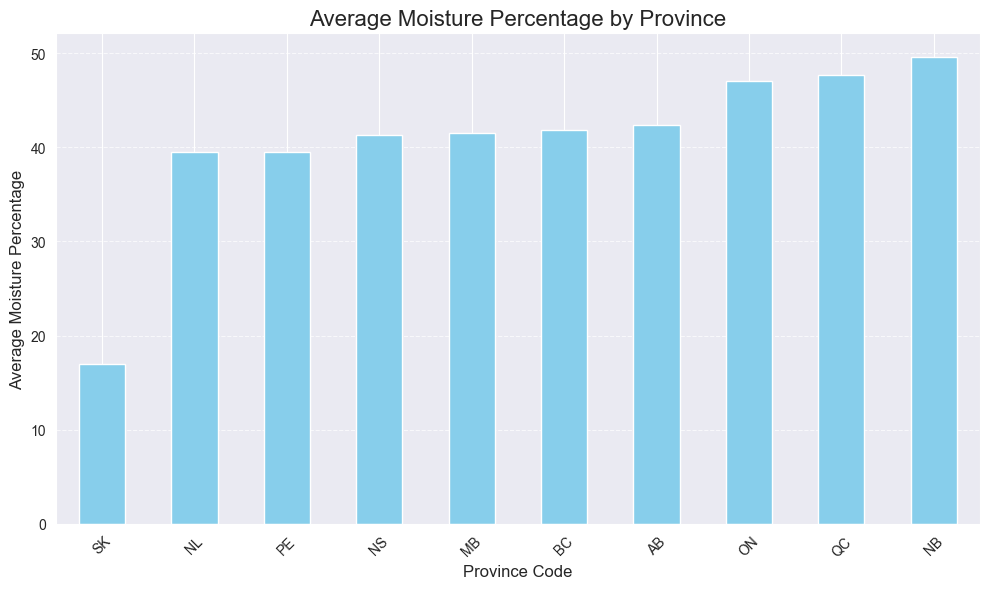

In [12]:
# Bar plot for average moisture percentage by province
plt.figure(figsize=(10, 6))
avg_moisture_by_province.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Moisture Percentage by Province', fontsize=16)
plt.xlabel('Province Code', fontsize=12)
plt.ylabel('Average Moisture Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [19]:
# Print the number of cheese entries per province
entry_counts = merged_df['ProvinceCode'].value_counts().sort_index()
print("Number of cheese entries by province:")
print(entry_counts)

Number of cheese entries by province:
ProvinceCode
AB      39
BC     325
MB      33
NB      81
NL       6
NS      30
ON     460
PE       6
QC    2388
SK       3
Name: count, dtype: int64


E:\Temp\ipykernel_5016\3979770934.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


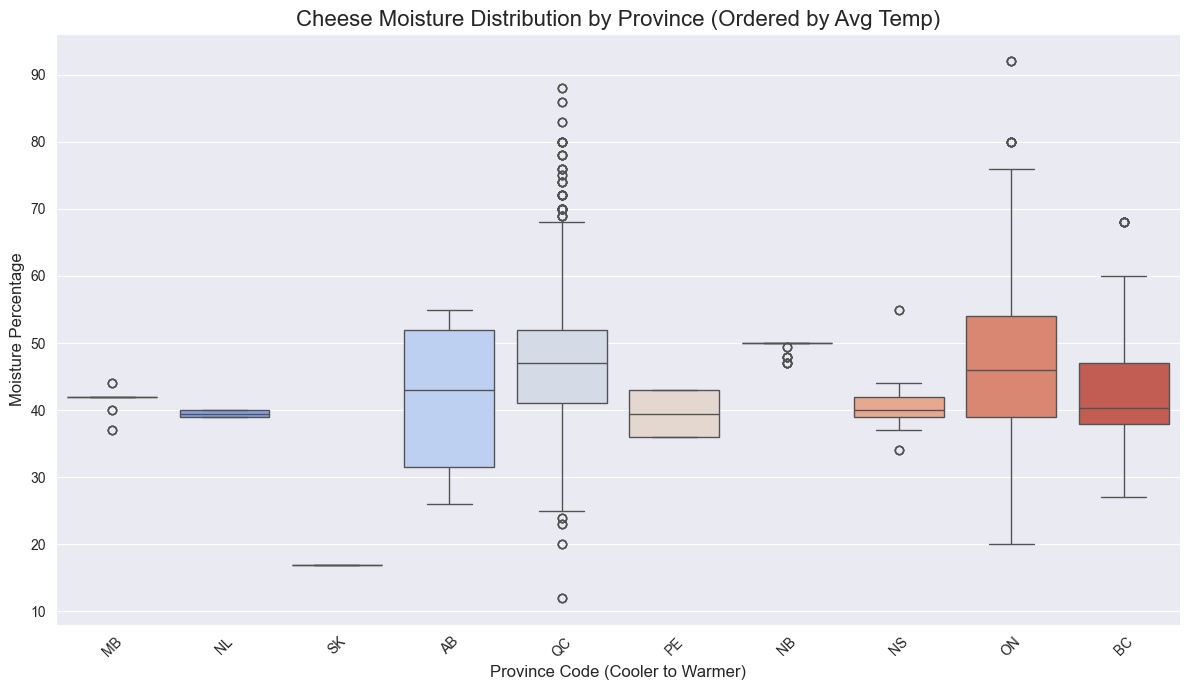

In [14]:

# Ensure temperature is numeric
# Convert 'Annual(Avg. high °C (°F))' to numeric, extracting the numeric part
merged_df['Annual_Temp'] = merged_df['Annual(Avg. high °C (°F))'].str.extract(r'([-+]?\d*\.\d+|\d+)').astype(float)

# Order provinces by average temperature
province_order = merged_df.groupby('ProvinceCode')['Annual_Temp'].mean().sort_values().index

# Create a boxplot of cheese moisture percentage by province, ordered by average temperature
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=merged_df,
    x='ProvinceCode',
    y='MoisturePercent',
    order=province_order,
    palette='coolwarm'
)
plt.title('Cheese Moisture Distribution by Province (Ordered by Avg Temp)', fontsize=16)
plt.xlabel('Province Code (Cooler to Warmer)', fontsize=12)
plt.ylabel('Moisture Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

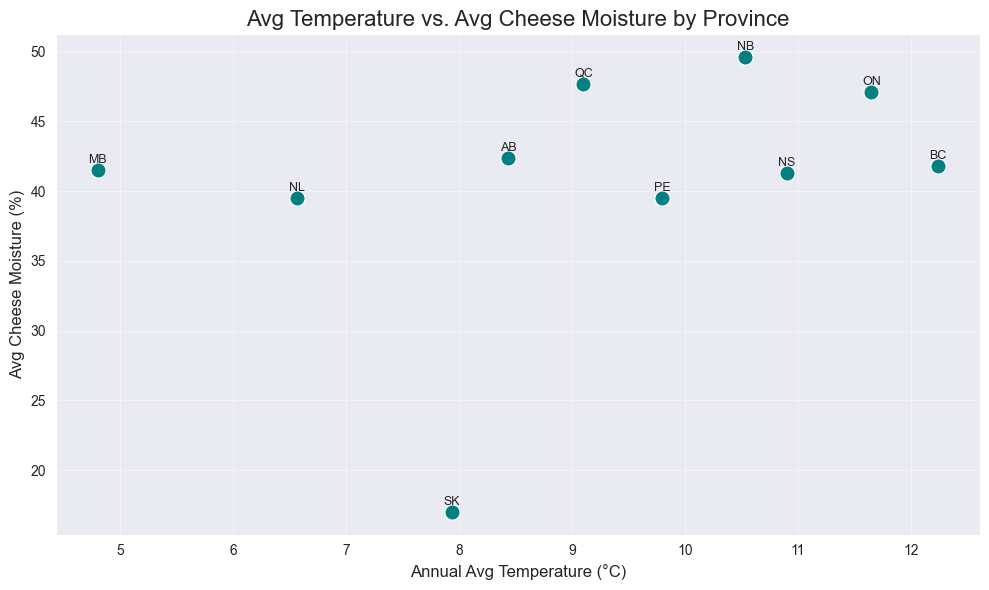

In [15]:
# Calculate province-level averages
# Group by 'ProvinceCode' and calculate mean temperature and moisture percentage

province_stats = merged_df.groupby('ProvinceCode').agg({
    'Annual_Temp': 'mean',
    'MoisturePercent': 'mean'
}).reset_index()

# Rename columns for clarity
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=province_stats,
    x='Annual_Temp',
    y='MoisturePercent',
    s=120,
    color='teal'
)
# Annotate points with province codes

for _, row in province_stats.iterrows():
    plt.text(row['Annual_Temp'], row['MoisturePercent']+0.5, row['ProvinceCode'], fontsize=9, ha='center')
plt.title('Avg Temperature vs. Avg Cheese Moisture by Province', fontsize=16)
plt.xlabel('Annual Avg Temperature (°C)', fontsize=12)
plt.ylabel('Avg Cheese Moisture (%)', fontsize=12)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


## Findings and Conclusions


After merging the Canadian Cheese Directory with provincial temperature data, I looked for patterns between climate and cheese across Canada.

My first chart,a boxplot showing cheese moisture by province (from coldest to warmest)—suggests that warmer provinces like Ontario and British Columbia generally have cheeses with higher and more varied moisture content. In contrast, colder provinces such as Manitoba and Newfoundland & Labrador tend to have cheeses with lower or more consistent moisture levels. This could mean that warmer climates are better suited to making softer, moister cheeses, possibly because of differences in cheese styles or how cheeses are aged.

The second chart, a scatter plot comparing each province’s average temperature and average cheese moisture, shows a weak but noticeable trend: provinces with higher average temperatures usually have cheeses with higher average moisture. However, this isn’t a perfect relationship. For example, Saskatchewan stands out as an outlier, likely because it has very few cheese entries in the dataset.

A quick note about the data:
Some provinces have a lot more cheese entries than others. Quebec (2,388 entries), Ontario (460), and British Columbia (325) are well represented, but places like Saskatchewan, Newfoundland & Labrador, and Prince Edward Island have just a handful of entries each. Because of this, the trends I found are much more reliable for provinces with lots of data, and less so for those with only a few cheeses listed.

Overall, it looks like climate does have some influence on the types of cheese made in each province, especially when it comes to moisture content. Warmer provinces seem to make more soft and moist cheeses, while colder ones lean toward firmer types. Still, it’s important to remember that things like local traditions, the kind of milk used, and the size of cheese producers also play a big role in what kinds of cheese are made across Canada.